<a href="https://colab.research.google.com/github/tai1203/tai/blob/master/%E7%88%AC%E8%9F%B2%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

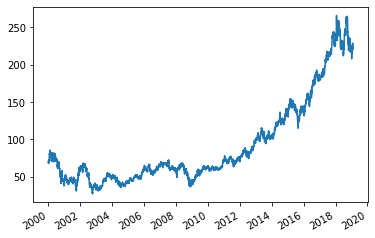

In [13]:
#@title
import requests
import json
import numpy as np
import pandas as pd


#stock site
site = "https://query1.finance.yahoo.com/v8/finance/chart/2330.TW?period1=0&period2=1549258857&interval=1d&events=history&=hP2rOschxO0"

#use requests to get data form finance server
response =  requests.get(site)

#make json to dataframe
data = json.loads(response.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))

df.head()

df.close.plot()



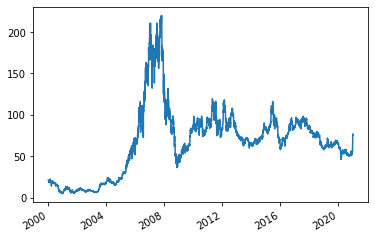

In [19]:
import requests
import json
import pandas as pd
import numpy as np
import datetime

#crawler function
def Crawl_price(stock_id):
  dateTime = datetime.datetime.now()
  url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2="+str(int(dateTime.timestamp()))+"&interval=1d&events=history&=hP2rOschxO0"

  res = requests.get(url)
  data = json.loads(res.text)
  df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
  return df


df = Crawl_price("2354.TW")
df.close.plot()



In [21]:
import requests
import json
import pandas as pd
import numpy as np
import datetime
import io

url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

findata = io.StringIO(response.text)
dfs = pd.read_html(findata)
world_index = dfs[0]

world_index

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,3768.25,-27.29,-0.72%,2.745B,NaN,NaN,NaN
1,^DJI,Dow 30,30814.26,-177.26,-0.57%,440.018M,NaN,NaN,NaN
2,^IXIC,Nasdaq,12998.50,-114.14,-0.87%,1.579B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),14894.17,-150.21,-1.00%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,2509.52,-47.44,-1.86%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100 Price Return,627.39,-6.82,-1.08%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,2123.20,-32.15,-1.49%,0,NaN,NaN,NaN
7,^VIX,CBOE Volatility Index,24.34,1.09,+4.69%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,6735.71,-66.25,-0.97%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,13787.73,-200.97,-1.44%,0,NaN,NaN,NaN


# 新增區段